## Imersão de Dados - Alura

### Apresentação

#### Autores
1.   [Grupo Alura](https://www.alura.com.br) - A maior plataforma brasileira de cursos de tecnologia.
2.   [Lucas Araújo](https://www.linkedin.com/in/lucasaraujo0255/) - Entusiasta de Data Science e cursando Ciências da Computação

### Resumo

Este documento tem o objetivo apresentar um estudo de Data Science oferecido na semana de Imersão de Dados da Alura (https://www.alura.com.br): uma análise exploratória sobre o Exame Nacional do Ensino Médio - o ENEM - na sua edição do ano de 2019 e criação de um modelo de Machine Learning utilizando o Python e as principais bibliotecas na área de Data Science.

### Ferramentas Utilizadas
A análise foi efetuada utilizando-se a linguagem de programação **Python** e suas bibliotecas para análise e processamento de dados **Pandas** e **NumPy**, bem como as bibliotecas **Matplotlib** e **Seaborn** para visualização de dados, além de API´s e outras bibliotecas que serão apresentadas no decorrer do documento.

Os dados foram disponibilizados pela Alura e contém cerca de 128 mil registros de inscrições de alunos que realizaram as provas do ENEM 2019.

Clique [Aqui](https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true.) para acessar os dados

#### Desafios - Dia 04:

**1**: Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula

**2**: Ler a documentação do Dummy e alterar o método de regressão

**3**: Buscar outra métrica modelos de regressão

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv('https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true')
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [3]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

In [4]:
df["NU_NOTA_TOTAL"] = df[provas].sum(axis = 1)

In [5]:
df_sem_zero = df.query("NU_NOTA_TOTAL != 0")
df_sem_zero = df_sem_zero[provas].dropna()

## [Aula 04](https://www.alura.com.br/imersao-dados/aula04-ml-machine-learning) - Machine Learning

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
provas_X = ["NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_CN", "NU_NOTA_REDACAO"]
provas_y = "NU_NOTA_MT"

X = df_sem_zero[provas_X]
y = df_sem_zero[provas_y]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [9]:
X_train.shape

(69402, 4)

In [10]:
len(y_train)

69402

In [11]:
X_test.shape

(23135, 4)

In [12]:
len(y_test)

23135

In [13]:
from sklearn.svm import LinearSVR

In [14]:
SVR = LinearSVR(random_state = 1)

SVR.fit(X_train, y_train)

C:\Users\Lucas\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=1, tol=0.0001, verbose=0)

In [15]:
previsao_MT = SVR.predict(X_test)

In [16]:
resultados = pd.DataFrame()
resultados["Real"] = y_test
resultados["Previsao"] = previsao_MT
resultados["diferença"] = resultados["Real"] - resultados["Previsao"]
resultados["quadrado_diferenca"] = (resultados["Real"] - resultados["Previsao"]) ** 2
resultados

,Real,Previsao,diferença,quadrado_diferenca
30566,527.8,382.277936,145.522064,21176.671080
115803,686.8,455.222316,231.577684,53628.223819
31677,560.2,352.729019,207.470981,43044.208005
65110,484.8,373.672339,111.127661,12349.357120
12134,365.9,355.358831,10.541169,111.116238
...,...,...,...,...
19996,410.4,385.515193,24.884807,619.253624
28811,462.3,372.477555,89.822445,8068.071690
30542,521.5,390.526338,130.973662,17154.100237
59013,432.8,326.647717,106.152283,11268.307159


(-50, 1050)

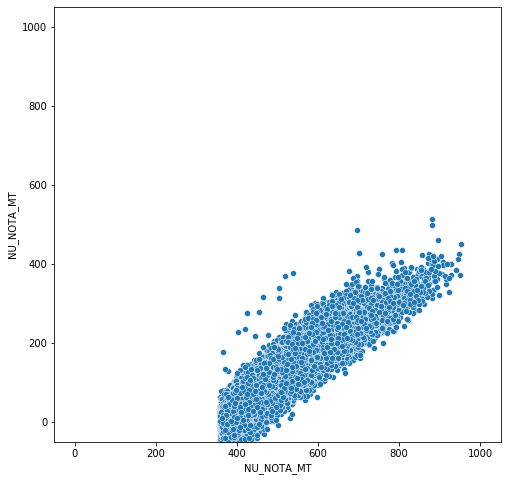

In [17]:
plt.figure(figsize = (8, 8))
sns.scatterplot(x= y_test, y = y_test - previsao_MT)
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

In [18]:
resultados["quadrado_diferenca"].mean()

23137.663031549255

In [19]:
resultados["quadrado_diferenca"].mean()**(1/2)

152.1106933504323

In [20]:
from sklearn.dummy import DummyRegressor

SVR_dummy = DummyRegressor()
SVR_dummy.fit(X_train, y_train)
dummy_previsao = SVR.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, dummy_previsao)

23137.66303154942

In [22]:
mean_squared_error(y_test, previsao_MT)

23137.66303154942

#### Desafio 01 - Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [24]:
def resultados(previsao):
    resultados = pd.DataFrame()
    resultados["Real"] = y_test
    resultados["Previsao"] = previsao
    resultados["diferença"] = resultados["Real"] - resultados["Previsao"]
    resultados["quadrado_diferenca"] = (resultados["Real"] - resultados["Previsao"]) ** 2
    return resultados

###### Decision Tree

In [25]:
DTR = DecisionTreeRegressor()

DTR.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [26]:
score = DTR.score(X_train, y_train)
score

1.0

In [27]:
y_pred_DTR = DTR.predict(X_test)

In [28]:
resultados(y_pred_DTR)

,Real,Previsao,diferença,quadrado_diferenca
30566,527.8,544.4,-16.6,275.56
115803,686.8,774.9,-88.1,7761.61
31677,560.2,412.2,148.0,21904.00
65110,484.8,615.8,-131.0,17161.00
12134,365.9,395.8,-29.9,894.01
...,...,...,...,...
19996,410.4,369.3,41.1,1689.21
28811,462.3,491.2,-28.9,835.21
30542,521.5,417.4,104.1,10836.81
59013,432.8,463.9,-31.1,967.21


In [29]:
mae_dtr = mean_absolute_error(y_test, y_pred_DTR)

mse_dtr = mean_squared_error(y_test, y_pred_DTR)

rsq_dtr =  r2_score(y_test, y_pred_DTR)

In [30]:
DTR.score(X_test, y_test)

0.05445358941001732

###### Random Forest

In [31]:
RFR = RandomForestRegressor(n_estimators=100)

In [32]:
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [33]:
score = RFR.score(X_train, y_train)
score

0.932049457771263

In [34]:
y_pred_RFR = RFR.predict(X_test)

In [35]:
resultados(y_pred_RFR)

,Real,Previsao,diferença,quadrado_diferenca
30566,527.8,506.487,21.313,454.243969
115803,686.8,686.152,0.648,0.419904
31677,560.2,457.729,102.471,10500.305841
65110,484.8,488.462,-3.662,13.410244
12134,365.9,463.977,-98.077,9619.097929
...,...,...,...,...
19996,410.4,471.335,-60.935,3713.074225
28811,462.3,457.862,4.438,19.695844
30542,521.5,477.016,44.484,1978.826256
59013,432.8,439.479,-6.679,44.609041


In [36]:
mae_rfr = mean_absolute_error(y_test, y_pred_RFR)

mse_rfr = mean_squared_error(y_test, y_pred_RFR)

rsq_rfr =  r2_score(y_test, y_pred_RFR)

In [37]:
RFR.score(X_test, y_test)

0.5164363301882484

###### Neural Networks

In [38]:
RNR = MLPRegressor(hidden_layer_sizes=(9,9))

In [39]:
RNR.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(9, 9), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [40]:
score = RNR.score(X_train, y_train)
score

0.5106822145157667

In [41]:
y_pred_RNR = RNR.predict(X_test)

In [42]:
resultados(y_pred_RNR)

,Real,Previsao,diferença,quadrado_diferenca
30566,527.8,509.191073,18.608927,346.292157
115803,686.8,644.784539,42.015461,1765.298972
31677,560.2,441.852166,118.347834,14006.209917
65110,484.8,502.599664,-17.799664,316.828041
12134,365.9,450.275716,-84.375716,7119.261481
...,...,...,...,...
19996,410.4,501.735871,-91.335871,8342.241390
28811,462.3,501.380465,-39.080465,1527.282760
30542,521.5,515.324876,6.175124,38.132159
59013,432.8,432.774701,0.025299,0.000640


In [43]:
mae_rnr = mean_absolute_error(y_test, y_pred_RNR)

mse_rnr = mean_squared_error(y_test, y_pred_RNR)

rsq_rnr =  r2_score(y_test, y_pred_RNR)

In [44]:
RNR.score(X_test, y_test)

0.5127083127593465

###### Comparação dos Modelos usados:

In [45]:
modelos = [('Decision Tree', mae_dtr, mse_dtr, rsq_dtr), 
          ('Random Forest', mae_rfr, mse_rfr, rsq_rfr),
          ('Neural Networks', mae_rnr, mse_rnr, rsq_rnr)]

df_comparando_modelos = pd.DataFrame(modelos, columns = ['Modelo', 'MAE', 'MSE', 'R²'])

df_comparando_modelos.head()

,Modelo,MAE,MSE,R²
0,Decision Tree,83.446099,11219.271764,0.054454
1,Random Forest,60.516814,5737.668893,0.516436
2,Neural Networks,61.587786,5781.903253,0.512708


#### Desafio 02: Ler a documentação do Dummy e alterar o método de regressão

In [46]:
DR = DummyRegressor(strategy='median')
DR.fit(X_train, y_train)
y_pred_DR = DR.predict(X_test)

In [47]:
mean_squared_error(y_test, y_pred_DR)

12310.138822563216

#### Desafio 03: Buscar outra métrica modelos de regressão

In [48]:
modelos = [('Decision Tree', mae_dtr, mse_dtr, rsq_dtr), 
          ('Random Forest', mae_rfr, mse_rfr, rsq_rfr),
          ('Neural Networks', mae_rnr, mse_rnr, rsq_rnr)]

df_comparando_modelos = pd.DataFrame(modelos, columns = ['Modelo', 'MAE', 'MSE', 'R²'])

df_comparando_modelos.head()

,Modelo,MAE,MSE,R²
0,Decision Tree,83.446099,11219.271764,0.054454
1,Random Forest,60.516814,5737.668893,0.516436
2,Neural Networks,61.587786,5781.903253,0.512708
